max borrow ratio 3.333333333333334


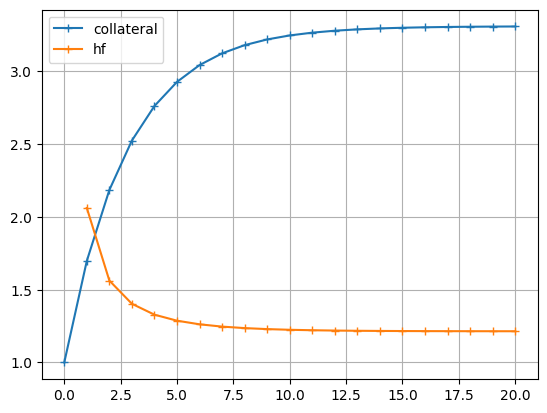

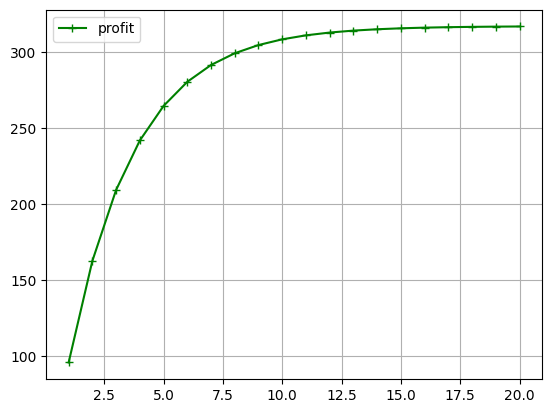

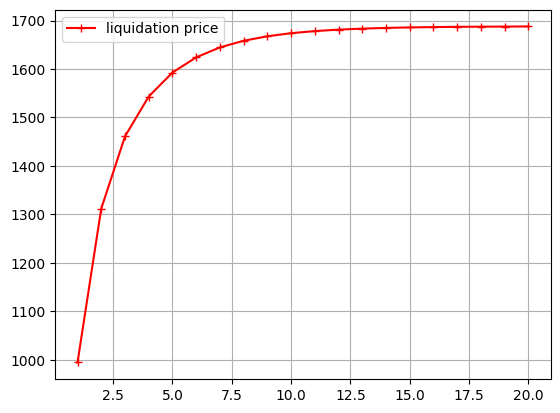

In [28]:
# Leverage - Lock ETH, borrow DAI
col_amt = 1
col_usd_price = 2000
col_usd = col_amt * col_usd_price

liq_threshold = 0.85
ltv = 0.8
ltv_buffer = 0.1
assert liq_threshold >= ltv >= ltv_buffer >= 0

# Max borrow ratio - geometric series
max_borrow_ratio = 1 / (1 - (ltv - ltv_buffer))
print("max borrow ratio", max_borrow_ratio)

# Interest rate on supply
r_s = 0
# Interest rate on borrow
r_b = 0.10
Y = 365

swap_fee = 0.003

borrow_usd_price = 1

## Leverage ##
plot_data = {
    "total_col_amt": [col_amt],
    "total_borrow_amt": [0],
    "hf": [None],
    "profit": [None],
    "liq_price": [None]
}
total_col_amt = col_amt
total_borrow_amt = 0

# Collateral available to be used to borrow
col_free = col_amt
for i in range(20):
    borrow_usd = (ltv - ltv_buffer) * col_free * col_usd_price
    borrow_amt = borrow_usd / borrow_usd_price

    # Assumes swap price is constant
    col_free = borrow_usd / col_usd_price * (1 - swap_fee)

    total_borrow_amt += borrow_amt
    total_col_amt += col_free
    hf = liq_threshold * total_col_amt * col_usd_price / (total_borrow_amt * borrow_usd_price)

    # Profit calculation
    # Simplifications
    # - no gas fee
    # - swap price is constant
    # - no interest on supply
    dt = 90
    delta_price = 1.1
    total_borrow_usd = (total_borrow_amt * (1 + r_b/Y)**dt) * borrow_usd_price
    profit = (total_col_amt - col_amt) * (1 - swap_fee) * (delta_price * col_usd_price) - total_borrow_usd

    # Price of liquidation
    # liquidation = hf <= 1
    # hf = liq_threshold * total_col_usd / total_borrow_usd <= 1
    # liquidation collateral price <= total_borrow_usd / (liq_threshold * total_col_amt)
    liq_price = total_borrow_usd / (liq_threshold * total_col_amt)

    plot_data["total_borrow_amt"].append(total_borrow_amt)
    plot_data["total_col_amt"].append(total_col_amt)
    plot_data["hf"].append(hf)
    plot_data["profit"].append(profit)
    plot_data["liq_price"].append(liq_price)

### Plot ###
import numpy as np
import matplotlib.pyplot as plt

plt.plot(plot_data["total_col_amt"], marker = "+")
plt.plot(plot_data["hf"], marker = "+")
plt.legend(["collateral", "hf"])
plt.grid()
plt.show()

plt.plot(plot_data["profit"], marker = "+", color = "green")
plt.legend(["profit"])
plt.grid()
plt.show()

plt.plot(plot_data["liq_price"], marker = "+", color = "red")
plt.legend(["liquidation price"])
plt.grid()
plt.show()

In [15]:
# TODO - short

0.5